In [17]:
#load MNSIT data

In [18]:
#https://www.kaggle.com/c/digit-recognizer/dara
#fuctions to read and show images.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
d0 =pd.read_csv("mnist_train.csv")
print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [21]:

l = d0['label']

In [22]:
d =d0.drop('label',axis =1)
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


In [23]:
#disp ir plot number 
plt.figure(figsize = (7,7))
idx = 10

<Figure size 504x504 with 0 Axes>

8


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


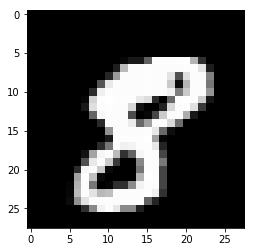

In [24]:
grid_data = d.iloc[idx].as_matrix().reshape(28,28) #reshape from 1d to 2 d pixel array
plt.imshow(grid_data,cmap = "gray")
print(l[idx])

# 2D visualization using PCA

In [25]:
# pick first 15k data-points ti work on for time - effeciency 
#excercise: perform the same analysis on all of 42k data-points

In [26]:
labels = l.head(15000)
data = d.head(15000)
print("the shape if sample data = ", data.shape)

the shape if sample data =  (15000, 784)


In [27]:
# Data preprocssing : standardizing the data

In [28]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [29]:
#find the co_variance matrix which is : A^T * A
sample_data = standardized_data

In [30]:
#matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

In [31]:
print("The shape of co var matrix = ", covar_matrix.shape)

The shape of co var matrix =  (784, 784)


In [32]:
#finding the top two eigen- values and corresponding eigen-vectors
#for projecting onto a 2-DIM space

In [33]:
from scipy.linalg import eigh
#the parameter 'ei(gvals' is defined (low value to high value)
#eigh fuction will return the eigen values in asending order
#this code generates onl the top 2 (782,783) eigenvalues
values , vectors = eigh(covar_matrix , eigvals = (782,783))

In [34]:
print("shpe of eigen vectors = ", vectors.shape)
# converting the eigen vector into (2,d) shape for easyness of further computations
vectors = vectors.T

shpe of eigen vectors =  (784, 2)


In [35]:
print(" updated shape of eigen vectors = ", vectors.shape)

 updated shape of eigen vectors =  (2, 784)


In [36]:
# projecting the original data sample on the plane 
# formed by two principal eigen vector by vector- vector multiplication

In [37]:
import matplotlib.pyplot as plt
new_cordinates = np.matmul(vectors, sample_data.T)

print("resultant new data points ' shape ", vectors.shape, "X",sample_data.T.shape,"=",new_cordinates.shape)

resultant new data points ' shape  (2, 784) X (784, 15000) = (2, 15000)


In [38]:
import pandas as pd

#appending label to the 2d projected data '
labels.shape
new_cordinates = np.vstack((new_cordinates,labels)).T

#creating a new data frame for ploting the labeled points 
dataframe = pd.DataFrame(data = new_cordinates , columns = ("1st_principal", "2nd_principal", "label"))
print(dataframe.head(5))

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


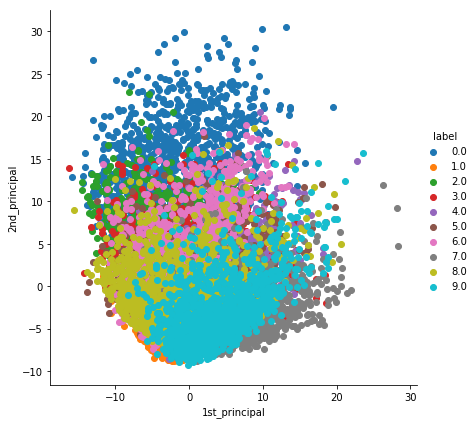

In [39]:
#ploting the 2d data points with seaborn 

import seaborn as sn
sn.FacetGrid(dataframe , hue ='label',height = 6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend() 


shape of reduced pca =  (15000, 2)


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


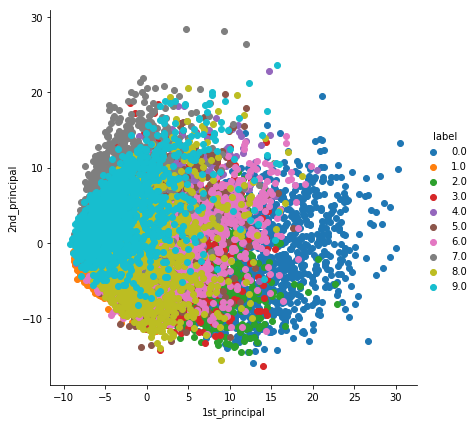

In [40]:
# PCA using sklearn

from sklearn import decomposition
pca = decomposition.PCA()

# Configuring the parameters
# the no of components = 2

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of reduced pca = ", pca_data.shape)


# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [45]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
dir(pca_data)
#print(pca_data.explained_variance_)

#percentage_var_explained = pca_data.explained_variance_ / np.sum(pca_data.variance_explained_);
#cum_var_explained = np.cumsum(percentage_var_explained)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [ ]:
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_var_explained')
plt.show()